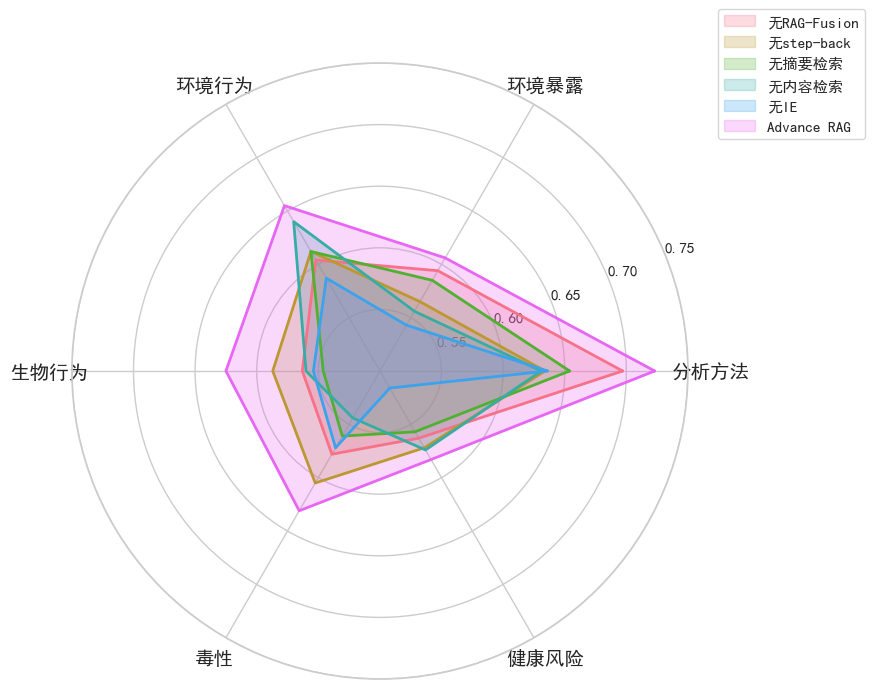

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 雷达图的领域数量
num_vars = 6

# 创建一个包含多个样本的数据集
data = np.array([
    [0.697, 0.594, 0.604, 0.563, 0.578, 0.563],  # 无RAG-Fusion
    [0.634, 0.565, 0.612, 0.587, 0.605, 0.572],  # 无step-back
    [0.654, 0.585, 0.612, 0.546, 0.561, 0.557],  # 无摘要检索
    [0.631, 0.556, 0.640, 0.560, 0.544, 0.574],  # 无内容检索
    [0.636, 0.543, 0.587, 0.554, 0.572, 0.516],  # 无IE
    [0.723, 0.606, 0.655, 0.625, 0.631, 0.583]   # Advance RAG
])

# 创建雷达图的角度，这将把圆均匀分成六部分
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 使雷达图封闭
data = np.concatenate((data, data[:, [0]]), axis=1)
angles += angles[:1]

# 样本标签
sample_labels = ['无RAG-Fusion', '无step-back', '无摘要检索', '无内容检索', '无IE', 'Advance RAG']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每一个样本，并添加标签以便在图例中使用
colors = sns.color_palette("husl", len(sample_labels))
for i, (d, label) in enumerate(zip(data, sample_labels)):
    ax.fill(angles, d, color=colors[i], alpha=0.25, label=label)
    ax.plot(angles, d, color=colors[i], linewidth=2)

# 设置雷达图的角度和标签
labels = ['分析方法', '环境暴露', '环境行为', '生物行为', '毒性', '健康风险']
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=14)  # 增大字体大小

# 设置雷达图的中心数值
ax.set_ylim(0.5, 0.75)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 显示图形
plt.show()
